#### Uses this article as a model: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_csv("./Resources/Clean_Data/Final_Data.csv")

In [3]:

time_series_data = data.filter(['Zip_Code', 'Date', 'FHA_Count'], axis=1)
time_series_data.Date=pd.to_datetime(time_series_data['Date'])
zip_grouped = time_series_data.groupby(['Zip_Code'])
fl_grouped = time_series_data.groupby(['Date'], as_index=False)['FHA_Count'].mean()
fl_grouped_df = pd.DataFrame(fl_grouped)
fl_grouped_arima = fl_grouped.set_index("Date")
# groups = dict(list(grouped))

# series['Date'] = [mdates.date2num(d) for d in series['Date']]
# for key in groups.keys():
#     print(key)



In [4]:
print(fl_grouped)

         Date  FHA_Count
0  2019-01-01   6.780093
1  2019-02-01   4.573598
2  2019-03-01   6.085781
3  2019-04-01   6.697143
4  2019-05-01   7.637088
5  2019-06-01   7.530822
6  2019-07-01   8.510227
7  2019-08-01   8.621868
8  2019-09-01   6.187215
9  2019-10-01   6.894198
10 2019-11-01   6.109840
11 2019-12-01   7.053348
12 2020-01-01   8.446591
13 2020-02-01   6.331429
14 2020-03-01   7.620296
15 2020-04-01   8.298731
16 2020-05-01   6.990826
17 2020-06-01   7.136054
18 2020-07-01   8.624146
19 2020-08-01   8.581236
20 2020-09-01   8.836571
21 2020-10-01   8.649828
22 2020-11-01   7.851894
23 2020-12-01   8.664384
24 2021-01-01   8.113662
25 2021-02-01   6.649412
26 2021-03-01   8.081509


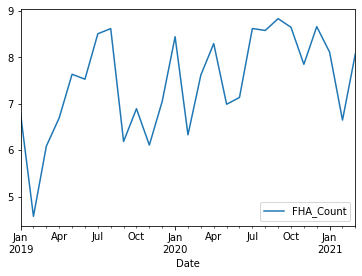

In [5]:
fl_grouped.plot(x='Date', y='FHA_Count')
plt.show()

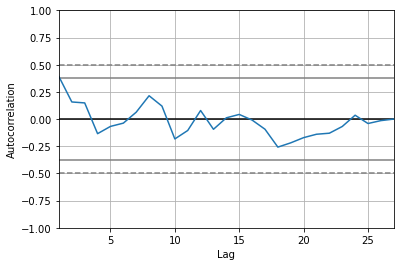

In [6]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(fl_grouped.set_index('Date'))
plt.show()

### For Florida, auto-correlation in the time series reveals sub-optimal correlation across the time series. Chose 4 for starting point for AR parameter of the model for consistency with other ARIMA data.


In [7]:
data=pd.Series(fl_grouped.FHA_Count.values, index=fl_grouped.Date)

C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -36.593
Date:                Fri, 04 Jun 2021   AIC                             85.186
Time:                        12:37:45   BI

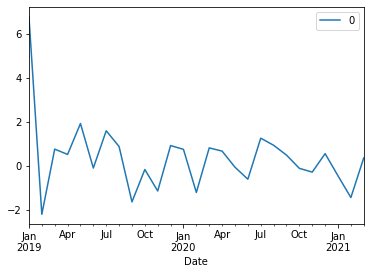

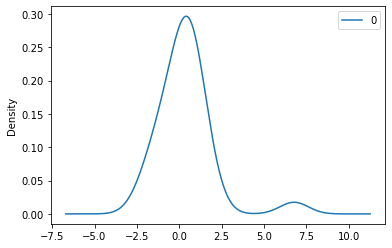

               0
count  27.000000
mean    0.359807
std     1.629909
min    -2.206491
25%    -0.371718
50%     0.486514
75%     0.844954
max     6.780093


In [8]:
# fit model
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [9]:
#Predict FHA_count for Florida for 4-21
yhat=model_fit.forecast()
print(yhat)

2021-04-01    7.905784
Freq: MS, dtype: float64


In [10]:
#Predict median home price for Florida based on time series another way
yhat_2 = model_fit.predict(start=len(data), end=len(data))
print(yhat_2)

2021-04-01    7.905784
Freq: MS, dtype: float64


In [11]:
# Work with zip code time series

zip_grouped_df = pd.DataFrame(zip_grouped)
# zip_grouped_df[1][0]
zip_32003 = zip_grouped_df[1][0]
zip_32003


,Zip_Code,Date,FHA_Count
0,32003,2019-01-01,7
1,32003,2019-02-01,2
2,32003,2019-03-01,7
3,32003,2019-04-01,3
4,32003,2019-05-01,8
5,32003,2019-06-01,3
6,32003,2019-07-01,7
7,32003,2019-08-01,5
8,32003,2019-09-01,3
9,32003,2019-10-01,5


In [12]:
zip_groups = zip_grouped_df[1]
zip_group_array = []
for i in zip_groups:
    zip_group_array.append(i)
print(zip_group_array[54])

      Zip_Code       Date  FHA_Count
1310     32131 2019-01-01          2
1311     32131 2019-02-01          1
1312     32131 2019-03-01          0
1313     32131 2019-04-01          1
1314     32131 2019-05-01          0
1315     32131 2019-06-01          1
1316     32131 2019-07-01          3
1317     32131 2019-08-01          1
1318     32131 2019-09-01          1
1319     32131 2019-10-01          1
1320     32131 2019-11-01          0
1321     32131 2019-12-01          1
1322     32131 2020-01-01          1
1323     32131 2020-02-01          1
1324     32131 2020-03-01          0
1325     32131 2020-04-01          0
1326     32131 2020-05-01          1
1327     32131 2020-06-01          2
1328     32131 2020-07-01          0
1329     32131 2020-08-01          1
1330     32131 2020-09-01          4
1331     32131 2020-10-01          0
1332     32131 2020-11-01          0
1333     32131 2020-12-01          0
1334     32131 2021-01-01          3
1335     32131 2021-02-01          1
1

In [13]:
reports={}
for i in zip_group_array:
    # current_group = zip_group_array[i]
    # j = current_group.Zip_Code.nunique()
    try:
        j = str(i.Zip_Code.unique().item(0))
        # print(j)
        i.drop("Zip_Code", axis=1)
        i.set_index("Date")
        data=pd.Series(i.FHA_Count.values, index=i.Date)
        # fit model
        model = ARIMA(data, order=(4,1,0))
        model_fit = model.fit()


        # summary of fit model
        # print(model_fit.summary())
        # line plot of residuals
        residuals = pd.DataFrame(model_fit.resid)
        # residuals.plot()
        # plt.show()
        # density plot of residuals
        # residuals.plot(kind='kde')
        # plt.show()
        # summary stats of residuals
        # print(residuals.describe())
        yhat=model_fit.forecast()[0]
        # print(j, yhat)
        reports[j] = yhat
    
    except:
        pass

 be used.
  % freq, ValueWarning)
C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\mille\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning

In [14]:
print(reports)

6, '32254': 4.09919402451062, '32256': 18.132043247943713, '32257': 9.410409723595054, '32258': 18.477308151493258, '32259': 17.98245757505329, '32266': -0.11789465881934337, '32277': 8.856177972563353, '32303': 20.918473982739027, '32304': 2.4082823521308625, '32305': 2.666093879509453, '32308': 4.650540583741986, '32309': 5.522940957302854, '32310': 0.645011141371536, '32311': 5.85991662418589, '32312': 3.5062973515527593, '32317': 2.2811514964186754, '32320': 1.1647414194063765, '32327': 14.071923824386577, '32328': -0.0033595713806246486, '32333': 2.1900140236407126, '32344': 6.7366881327140025, '32346': 1.7888976063838533e-67, '32347': 3.1250872844323956, '32348': 1.5924197147749983, '32359': 8.765534986747906e-18, '32401': 10.3820405598404, '32404': 29.500485342014937, '32405': 12.853167136532623, '32407': 4.968771258695673, '32408': 5.897291200022359, '32413': 3.3421450288359487, '32425': 2.104372351418596, '32428': 7.9759298629300055, '32433': 3.0067983989719833, '32435': 1.761

In [17]:
zip_code_april_2021_FHA_preds = pd.DataFrame.from_dict(reports, orient='index')
zip_code_april_2021_FHA_preds = zip_code_april_2021_FHA_preds.reset_index()
zip_code_april_2021_FHA_preds = zip_code_april_2021_FHA_preds.rename(columns={'index':'Zip_Code',0:'ARIMA_FHA_Counts'})
ARIMA_path = os.path.abspath('Resources/ML_Outputs/April_2021_FHA_preds_by_zip.csv')
zip_code_april_2021_FHA_preds.to_csv(ARIMA_path, index=False)
zip_code_april_2021_FHA_preds.head()

,Zip_Code,ARIMA_FHA_Counts
0,32003,8.060742
1,32011,5.806886
2,32024,5.124532
3,32025,3.053720
4,32033,1.418528


In [28]:
# Bins for 'high growth', 'low growth', and 'loss' groups
# growth_bins = {}
# for name, values in 

# fl_grouped = time_series_data.groupby(['Date'], as_index=False)['Sale_Price'].mean()
# fl_grouped_df = pd.DataFrame(fl_grouped)
# fl_grouped_arima = fl_grouped.set_index("Date")

In [19]:
print(len(zip_code_april_2021_FHA_preds))

777
